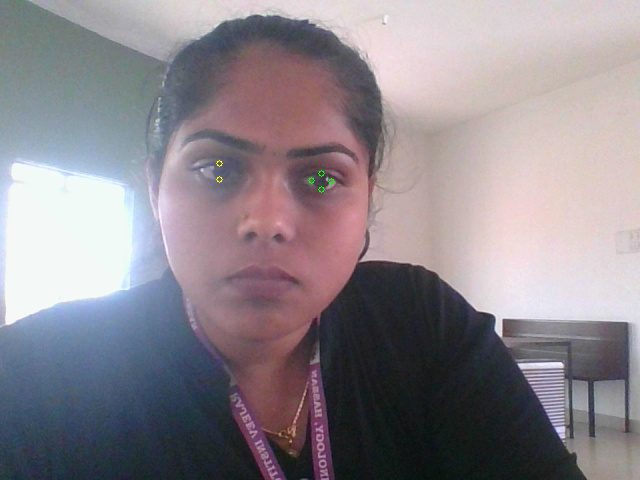

Exception ignored in: <function _xla_gc_callback at 0x000001A2711A4540>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\jax\_src\lib\__init__.py", line 97, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [1]:
import cv2
import mediapipe as mp
import pyautogui
from IPython.display import display, clear_output, Image
from PIL import Image as PILImage
import io
import time

# Initialize the webcam and face mesh
cam = cv2.VideoCapture(0)
face_mesh = mp.solutions.face_mesh.FaceMesh(refine_landmarks=True)
screen_w, screen_h = pyautogui.size()

# Capture and display the webcam feed
try:
    while True:
        ret, frame = cam.read()
        if not ret:
            print("Failed to capture frame")
            break
        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        output = face_mesh.process(rgb_frame)
        landmark_points = output.multi_face_landmarks
        frame_h, frame_w, _ = frame.shape
        if landmark_points:
            landmarks = landmark_points[0].landmark
            for id, landmark in enumerate(landmarks[474:478]):
                x = int(landmark.x * frame_w)
                y = int(landmark.y * frame_h)
                cv2.circle(frame, (x, y), 3, (0, 255, 0))
                if id == 1:
                    screen_x = screen_w * landmark.x
                    screen_y = screen_h * landmark.y
                    pyautogui.moveTo(screen_x, screen_y)
            left = [landmarks[145], landmarks[159]]
            for landmark in left:
                x = int(landmark.x * frame_w)
                y = int(landmark.y * frame_h)
                cv2.circle(frame, (x, y), 3, (0, 255, 255))
            if (left[0].y - left[1].y) < 0.004:
                pyautogui.click()
                time.sleep(1)

        # Convert the frame to display in Jupyter
        _, buffer = cv2.imencode('.jpg', frame)
        img = PILImage.open(io.BytesIO(buffer))

        # Clear previous output and display the new frame
        clear_output(wait=True)
        display(img)

except KeyboardInterrupt:
    print("Stopped by user")

finally:
    cam.release()
    cv2.destroyAllWindows()
